In [4]:
# step 0: Data Loading
import pandas as pd


arousal_path = './data/annotations/arousal.csv'
valence_path = './data/annotations/valence.csv'

# Load the CSV files into dataframes
arousal_df = pd.read_csv(arousal_path)
valence_df = pd.read_csv(valence_path)

# Display first few rows of both dataframes to understand the structure
arousal_df.head(), valence_df.head()


ERROR! Session/line number was not unique in database. History logging moved to new session 3


(   song_id  sample_15000ms  sample_15500ms  sample_16000ms  sample_16500ms  \
 0        2       -0.109386       -0.114942       -0.116413       -0.118613   
 1        3       -0.110846       -0.123973       -0.131103       -0.135956   
 2        4        0.222327        0.179446        0.178388        0.184056   
 3        5       -0.255613       -0.251579       -0.251958       -0.251124   
 4        7        0.464234        0.460789        0.460991        0.461046   
 
    sample_17000ms  sample_17500ms  sample_18000ms  sample_18500ms  \
 0       -0.126457       -0.133199       -0.136855       -0.144713   
 1       -0.140775       -0.144664       -0.163118       -0.165218   
 2        0.176042        0.178720        0.176345        0.175793   
 3       -0.250763       -0.251957       -0.251957       -0.251957   
 4        0.457240        0.465702        0.471809        0.469918   
 
    sample_19000ms  ...  sample_622000ms  sample_622500ms  sample_623000ms  \
 0       -0.138985  ... 

In [5]:
# Compute average valence and arousal for each song
valence_df['avg_valence'] = valence_df.iloc[:, 1:].mean(axis=1)
arousal_df['avg_arousal'] = arousal_df.iloc[:, 1:].mean(axis=1)

# Merge the two dataframes on song_id
merged_df = pd.merge(valence_df[['song_id', 'avg_valence']], arousal_df[['song_id', 'avg_arousal']], on='song_id')

# Label the songs as "happy" (1) or "sad" (0)
def label_emotion(row):
    if row['avg_valence'] >= 0 and row['avg_arousal'] >= 0:
        return 1  # Happy
    else:
        return 0  # Sad

# Apply labeling
merged_df['label'] = merged_df.apply(label_emotion, axis=1)

# Prepare the features (valence, arousal) and labels
X = merged_df[['avg_valence', 'avg_arousal']]
y = merged_df['label']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic Regression, Decision Tree, and Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
log_conf_matrix = confusion_matrix(y_test, y_pred_log)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)

# Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, y_pred_forest)
forest_conf_matrix = confusion_matrix(y_test, y_pred_forest)

# Results
log_accuracy, log_conf_matrix, tree_accuracy, tree_conf_matrix, forest_accuracy, forest_conf_matrix


(0.9224376731301939,
 array([[167,  14],
        [ 14, 166]]),
 0.997229916897507,
 array([[181,   0],
        [  1, 179]]),
 0.997229916897507,
 array([[181,   0],
        [  1, 179]]))

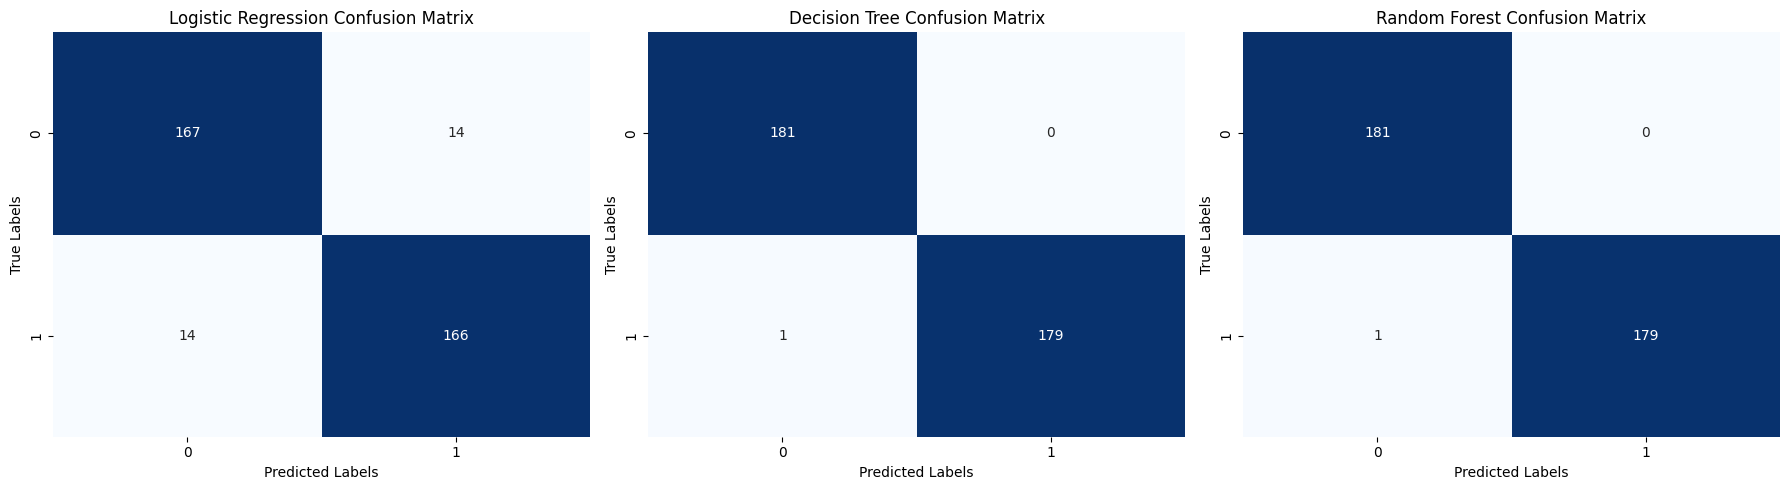

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot confusion matrices for Logistic Regression, Decision Tree, and Random Forest

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(log_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Decision Tree Confusion Matrix
sns.heatmap(tree_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

# Random Forest Confusion Matrix
sns.heatmap(forest_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[2])
axes[2].set_title("Random Forest Confusion Matrix")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

# Plot accuracies for comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [log_accuracy, tree_accuracy, forest_accuracy]




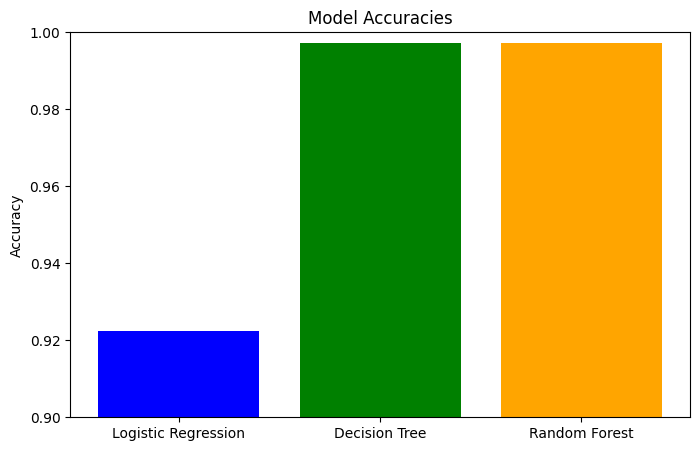

In [7]:
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0.9, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


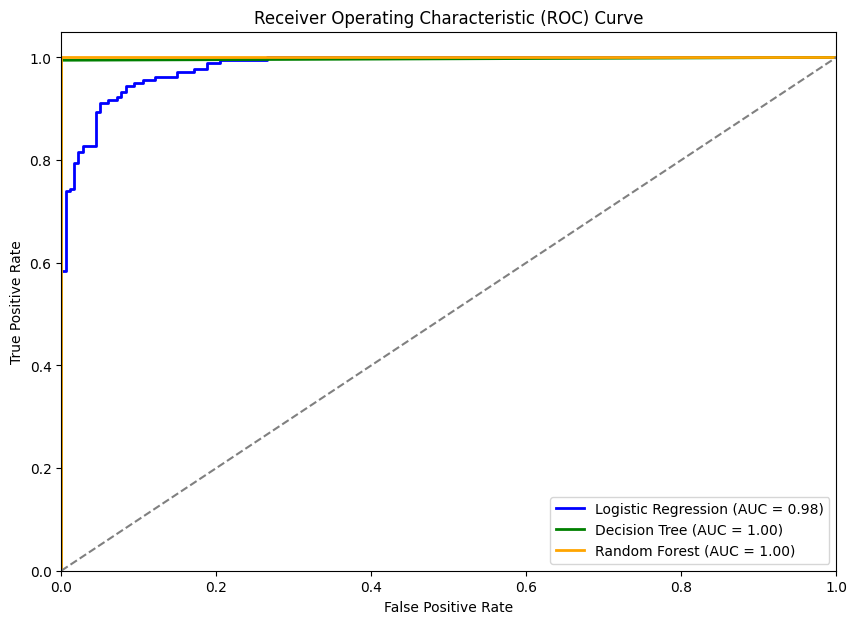

In [8]:
# ROC curve
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for each model

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc_log = auc(fpr_log, tpr_log)

# Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Random Forest
fpr_forest, tpr_forest, _ = roc_curve(y_test, forest_model.predict_proba(X_test)[:,1])
roc_auc_forest = auc(fpr_forest, tpr_forest)

# Plot the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr_forest, tpr_forest, color='orange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_forest)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Fear and Calm

In [9]:
# Label the songs as "fear" (1) or "calm" (0) based on new criteria
def label_fear_calm(row):
    if row['avg_arousal'] >= 0 and row['avg_valence'] < 0:
        return 1  # Fear
    elif row['avg_arousal'] < 0 and row['avg_valence'] >= 0:
        return 0  # Calm
    else:
        return None  # Exclude other combinations

# Apply labeling to create a new dataset for fear vs calm
merged_df['fear_calm_label'] = merged_df.apply(label_fear_calm, axis=1)

# Remove rows with None labels (those that don't fit fear or calm)
fear_calm_df = merged_df.dropna(subset=['fear_calm_label'])

# Prepare the features (valence, arousal) and labels (fear or calm)
X_fear_calm = fear_calm_df[['avg_valence', 'avg_arousal']]
y_fear_calm = fear_calm_df['fear_calm_label']

# Split the data into training and testing sets
X_train_fc, X_test_fc, y_train_fc, y_test_fc = train_test_split(X_fear_calm, y_fear_calm, test_size=0.2, random_state=42)

# Apply Logistic Regression, Decision Tree, and Random Forest for the new labels
# Logistic Regression
log_reg_fc = LogisticRegression()
log_reg_fc.fit(X_train_fc, y_train_fc)
y_pred_log_fc = log_reg_fc.predict(X_test_fc)
log_accuracy_fc = accuracy_score(y_test_fc, y_pred_log_fc)
log_conf_matrix_fc = confusion_matrix(y_test_fc, y_pred_log_fc)

# Decision Tree
tree_model_fc = DecisionTreeClassifier()
tree_model_fc.fit(X_train_fc, y_train_fc)
y_pred_tree_fc = tree_model_fc.predict(X_test_fc)
tree_accuracy_fc = accuracy_score(y_test_fc, y_pred_tree_fc)
tree_conf_matrix_fc = confusion_matrix(y_test_fc, y_pred_tree_fc)

# Random Forest
forest_model_fc = RandomForestClassifier()
forest_model_fc.fit(X_train_fc, y_train_fc)
y_pred_forest_fc = forest_model_fc.predict(X_test_fc)
forest_accuracy_fc = accuracy_score(y_test_fc, y_pred_forest_fc)
forest_conf_matrix_fc = confusion_matrix(y_test_fc, y_pred_forest_fc)

# Results
log_accuracy_fc, log_conf_matrix_fc, tree_accuracy_fc, tree_conf_matrix_fc, forest_accuracy_fc, forest_conf_matrix_fc


(1.0,
 array([[38,  0],
        [ 0, 51]]),
 0.9887640449438202,
 array([[37,  1],
        [ 0, 51]]),
 1.0,
 array([[38,  0],
        [ 0, 51]]))

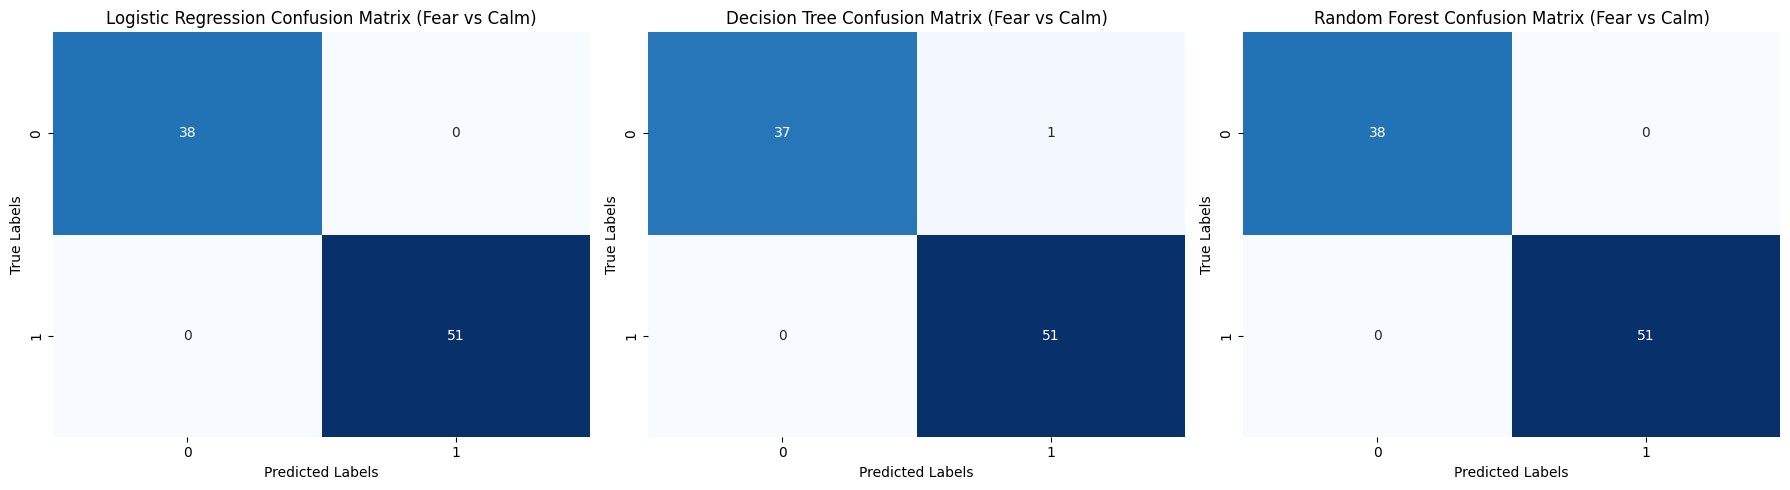

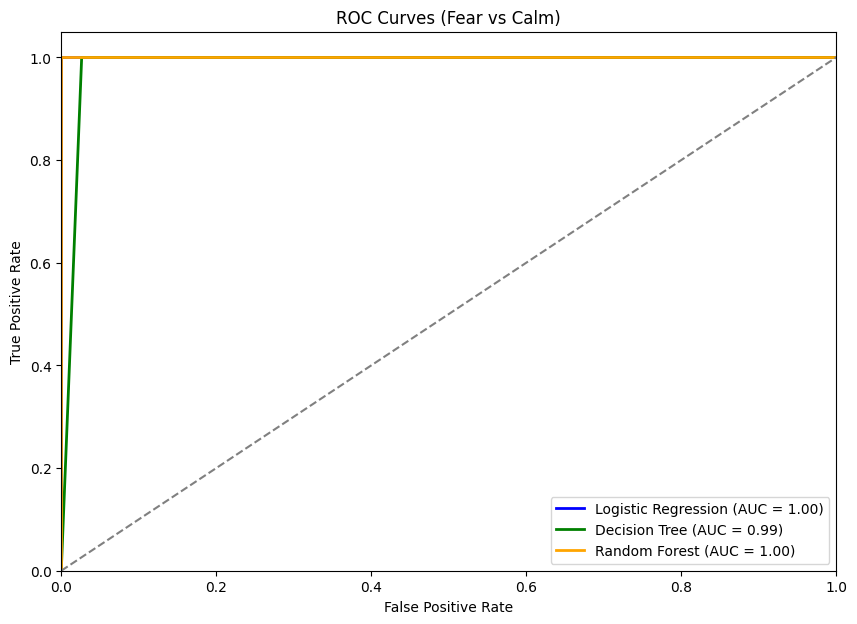

In [10]:
# Plot confusion matrices for Logistic Regression, Decision Tree, and Random Forest (Fear vs Calm)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression Confusion Matrix (Fear vs Calm)
sns.heatmap(log_conf_matrix_fc, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix (Fear vs Calm)")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Decision Tree Confusion Matrix (Fear vs Calm)
sns.heatmap(tree_conf_matrix_fc, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix (Fear vs Calm)")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

# Random Forest Confusion Matrix (Fear vs Calm)
sns.heatmap(forest_conf_matrix_fc, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[2])
axes[2].set_title("Random Forest Confusion Matrix (Fear vs Calm)")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

# ROC Curves for Fear vs Calm

# Logistic Regression (Fear vs Calm)
fpr_log_fc, tpr_log_fc, _ = roc_curve(y_test_fc, log_reg_fc.predict_proba(X_test_fc)[:, 1])
roc_auc_log_fc = auc(fpr_log_fc, tpr_log_fc)

# Decision Tree (Fear vs Calm)
fpr_tree_fc, tpr_tree_fc, _ = roc_curve(y_test_fc, tree_model_fc.predict_proba(X_test_fc)[:, 1])
roc_auc_tree_fc = auc(fpr_tree_fc, tpr_tree_fc)

# Random Forest (Fear vs Calm)
fpr_forest_fc, tpr_forest_fc, _ = roc_curve(y_test_fc, forest_model_fc.predict_proba(X_test_fc)[:, 1])
roc_auc_forest_fc = auc(fpr_forest_fc, tpr_forest_fc)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log_fc, tpr_log_fc, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_fc)
plt.plot(fpr_tree_fc, tpr_tree_fc, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_tree_fc)
plt.plot(fpr_forest_fc, tpr_forest_fc, color='orange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_forest_fc)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Fear vs Calm)')
plt.legend(loc='lower right')
plt.show()


# Joy and Anger

In [11]:
# Label the songs as "joy" (1) or "anger" (0) based on new criteria
def label_joy_anger(row):
    if row['avg_arousal'] >= 0 and row['avg_valence'] >= 0:
        return 1  # Joy
    elif row['avg_arousal'] >= 0 and row['avg_valence'] < 0:
        return 0  # Anger
    else:
        return None  # Exclude other combinations

# Apply labeling to create a new dataset for joy vs anger
merged_df['joy_anger_label'] = merged_df.apply(label_joy_anger, axis=1)

# Remove rows with None labels (those that don't fit joy or anger)
joy_anger_df = merged_df.dropna(subset=['joy_anger_label'])

# Prepare the features (valence, arousal) and labels (joy or anger)
X_joy_anger = joy_anger_df[['avg_valence', 'avg_arousal']]
y_joy_anger = joy_anger_df['joy_anger_label']

# Split the data into training and testing sets
X_train_ja, X_test_ja, y_train_ja, y_test_ja = train_test_split(X_joy_anger, y_joy_anger, test_size=0.2, random_state=42)

# Apply Logistic Regression, Decision Tree, and Random Forest for the new labels
# Logistic Regression
log_reg_ja = LogisticRegression()
log_reg_ja.fit(X_train_ja, y_train_ja)
y_pred_log_ja = log_reg_ja.predict(X_test_ja)
log_accuracy_ja = accuracy_score(y_test_ja, y_pred_log_ja)
log_conf_matrix_ja = confusion_matrix(y_test_ja, y_pred_log_ja)

# Decision Tree
tree_model_ja = DecisionTreeClassifier()
tree_model_ja.fit(X_train_ja, y_train_ja)
y_pred_tree_ja = tree_model_ja.predict(X_test_ja)
tree_accuracy_ja = accuracy_score(y_test_ja, y_pred_tree_ja)
tree_conf_matrix_ja = confusion_matrix(y_test_ja, y_pred_tree_ja)

# Random Forest
forest_model_ja = RandomForestClassifier()
forest_model_ja.fit(X_train_ja, y_train_ja)
y_pred_forest_ja = forest_model_ja.predict(X_test_ja)
forest_accuracy_ja = accuracy_score(y_test_ja, y_pred_forest_ja)
forest_conf_matrix_ja = confusion_matrix(y_test_ja, y_pred_forest_ja)

# Results
log_accuracy_ja, log_conf_matrix_ja, tree_accuracy_ja, tree_conf_matrix_ja, forest_accuracy_ja, forest_conf_matrix_ja


(0.9753086419753086,
 array([[ 38,   6],
        [  0, 199]]),
 1.0,
 array([[ 44,   0],
        [  0, 199]]),
 1.0,
 array([[ 44,   0],
        [  0, 199]]))

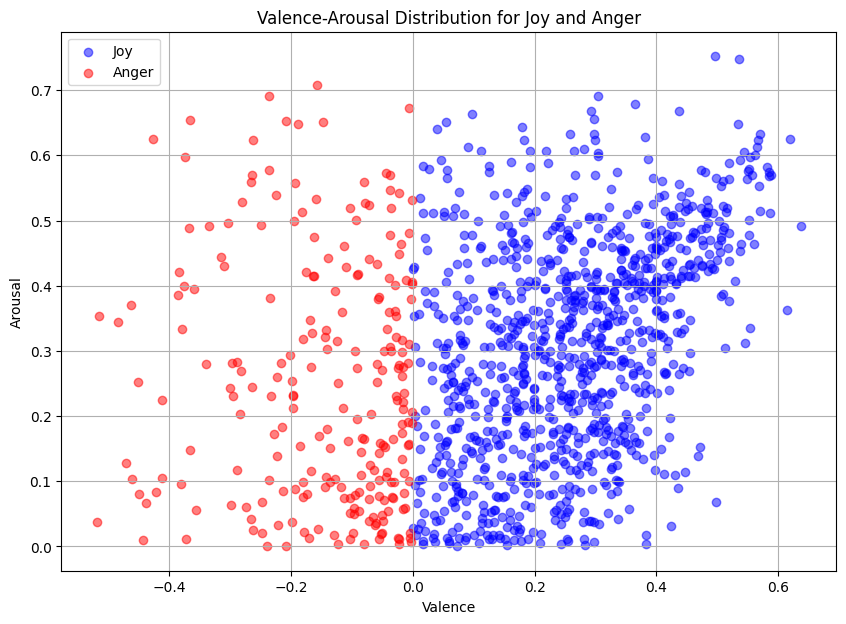

In [12]:
# Visualize the distribution of valence and arousal for "joy" and "anger"
plt.figure(figsize=(10, 7))

# Plot joy and anger data points
plt.scatter(joy_anger_df[joy_anger_df['joy_anger_label'] == 1]['avg_valence'], 
            joy_anger_df[joy_anger_df['joy_anger_label'] == 1]['avg_arousal'], 
            color='blue', label='Joy', alpha=0.5)

plt.scatter(joy_anger_df[joy_anger_df['joy_anger_label'] == 0]['avg_valence'], 
            joy_anger_df[joy_anger_df['joy_anger_label'] == 0]['avg_arousal'], 
            color='red', label='Anger', alpha=0.5)

# Add labels and title
plt.title('Valence-Arousal Distribution for Joy and Anger')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.legend()
plt.grid(True)
plt.show()



# Multi Classification

In [13]:
# Label the songs into multiple emotional categories (Happy, Sad, Joy, Anger, Calm, Fear) based on valence and arousal
def label_multi_emotion(row):
    if row['avg_valence'] >= 0 and row['avg_arousal'] >= 0:
        if row['avg_valence'] > 0.5:  # Distinguish between joy and happy
            return 'Joy'
        else:
            return 'Happy'
    elif row['avg_valence'] < 0 and row['avg_arousal'] >= 0:
        if row['avg_arousal'] > 0.5:  # Distinguish between anger and fear
            return 'Anger'
        else:
            return 'Fear'
    elif row['avg_valence'] < 0 and row['avg_arousal'] < 0:
        return 'Sad'
    else:
        return 'Calm'

# Apply multi-class labeling
merged_df['multi_emotion_label'] = merged_df.apply(label_multi_emotion, axis=1)

# Prepare the features (valence, arousal) and labels (multi-class emotion)
X_multi_emotion = merged_df[['avg_valence', 'avg_arousal']]
y_multi_emotion = merged_df['multi_emotion_label']

# Convert labels to numerical values for model training
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_multi_emotion_encoded = label_encoder.fit_transform(y_multi_emotion)

# Split the data into training and testing sets
X_train_me, X_test_me, y_train_me, y_test_me = train_test_split(X_multi_emotion, y_multi_emotion_encoded, test_size=0.2, random_state=42)

# Train Logistic Regression, Decision Tree, and Random Forest for multi-class classification
# Logistic Regression
log_reg_me = LogisticRegression(multi_class='multinomial', max_iter=200)
log_reg_me.fit(X_train_me, y_train_me)
y_pred_log_me = log_reg_me.predict(X_test_me)
log_accuracy_me = accuracy_score(y_test_me, y_pred_log_me)
log_conf_matrix_me = confusion_matrix(y_test_me, y_pred_log_me)

# Decision Tree
tree_model_me = DecisionTreeClassifier()
tree_model_me.fit(X_train_me, y_train_me)
y_pred_tree_me = tree_model_me.predict(X_test_me)
tree_accuracy_me = accuracy_score(y_test_me, y_pred_tree_me)
tree_conf_matrix_me = confusion_matrix(y_test_me, y_pred_tree_me)

# Random Forest
forest_model_me = RandomForestClassifier()
forest_model_me.fit(X_train_me, y_train_me)
y_pred_forest_me = forest_model_me.predict(X_test_me)
forest_accuracy_me = accuracy_score(y_test_me, y_pred_forest_me)
forest_conf_matrix_me = confusion_matrix(y_test_me, y_pred_forest_me)

# Results
log_accuracy_me, log_conf_matrix_me, tree_accuracy_me, tree_conf_matrix_me, forest_accuracy_me, forest_conf_matrix_me


/Users/abhisekjha/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


(0.8587257617728532,
 array([[  0,   0,   5,   2,   0,   0],
        [  0,  24,   0,   8,   0,  11],
        [  0,   0,  31,  11,   0,   3],
        [  0,   0,   0, 170,   0,   0],
        [  0,   0,   0,  10,   0,   0],
        [  0,   0,   0,   1,   0,  85]]),
 0.9889196675900277,
 array([[  7,   0,   0,   0,   0,   0],
        [  0,  43,   0,   0,   0,   0],
        [  0,   0,  45,   0,   0,   0],
        [  0,   1,   0, 169,   0,   0],
        [  0,   0,   0,   1,   9,   0],
        [  0,   0,   2,   0,   0,  84]]),
 0.9944598337950139,
 array([[  7,   0,   0,   0,   0,   0],
        [  0,  43,   0,   0,   0,   0],
        [  0,   0,  45,   0,   0,   0],
        [  0,   0,   0, 170,   0,   0],
        [  0,   0,   0,   1,   9,   0],
        [  0,   0,   1,   0,   0,  85]]))

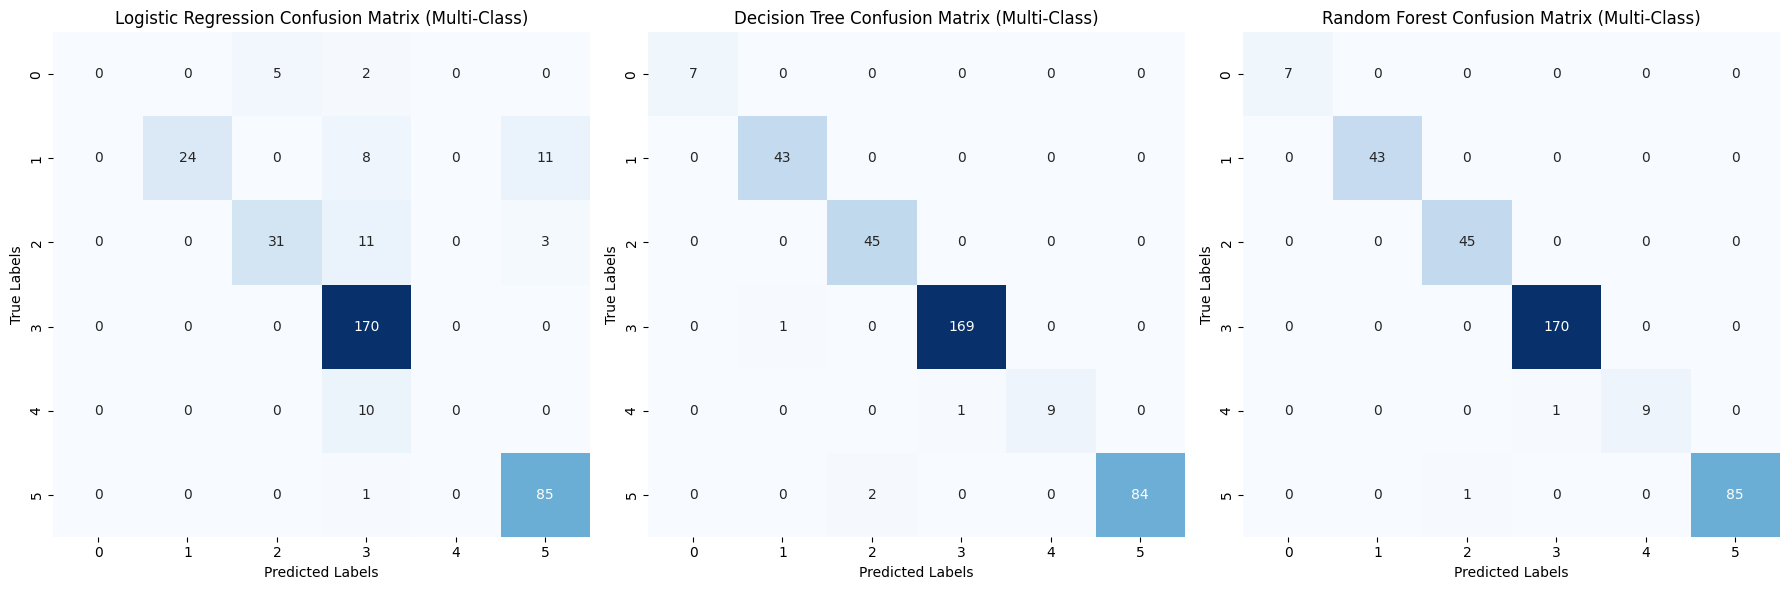

In [14]:
# Visualize confusion matrices for Logistic Regression, Decision Tree, and Random Forest (Multi-Class Emotion Classification)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Logistic Regression Confusion Matrix (Multi-Class Emotion Classification)
sns.heatmap(log_conf_matrix_me, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix (Multi-Class)")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Decision Tree Confusion Matrix (Multi-Class Emotion Classification)
sns.heatmap(tree_conf_matrix_me, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix (Multi-Class)")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

# Random Forest Confusion Matrix (Multi-Class Emotion Classification)
sns.heatmap(forest_conf_matrix_me, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[2])
axes[2].set_title("Random Forest Confusion Matrix (Multi-Class)")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")

plt.tight_layout()
plt.show()


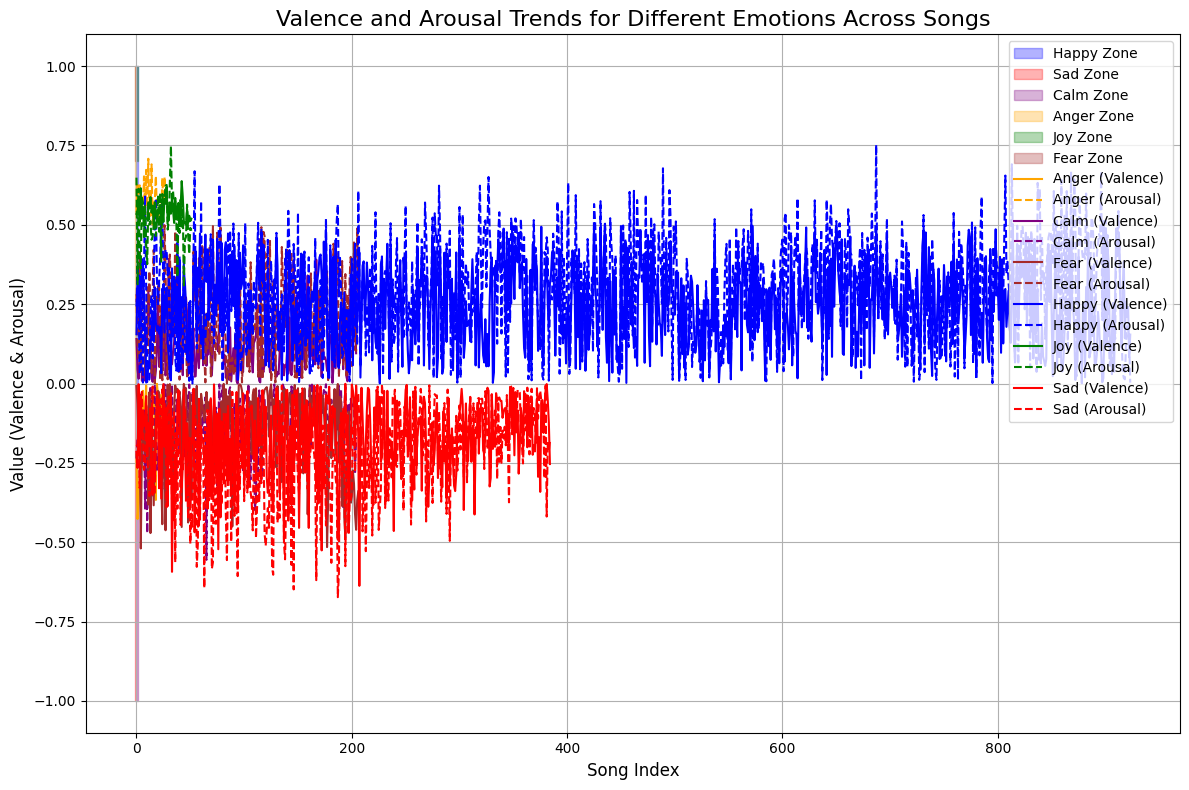

In [45]:
# Add smoothed curves to represent each emotion across different songs
plt.figure(figsize=(12, 8))

# Create colors for different emotions
emotion_colors = {
    'Happy': 'blue',
    'Sad': 'red',
    'Joy': 'green',
    'Anger': 'orange',
    'Calm': 'purple',
    'Fear': 'brown'
}

# Group the data by emotion labels
grouped = merged_df.groupby('multi_emotion_label')

# Plot average valence and arousal for each emotion group
for emotion, group in grouped:
    # Plot a smoothed curve for each emotion based on avg_valence and avg_arousal
    sns.lineplot(x=np.arange(len(group)), y=group['avg_valence'], color=emotion_colors[emotion], label=f"{emotion} (Valence)", linestyle='-')
    sns.lineplot(x=np.arange(len(group)), y=group['avg_arousal'], color=emotion_colors[emotion], label=f"{emotion} (Arousal)", linestyle='--')

# Add titles and labels
plt.title('Valence and Arousal Trends for Different Emotions Across Songs', fontsize=16)
plt.xlabel('Song Index', fontsize=12)
plt.ylabel('Value (Valence & Arousal)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

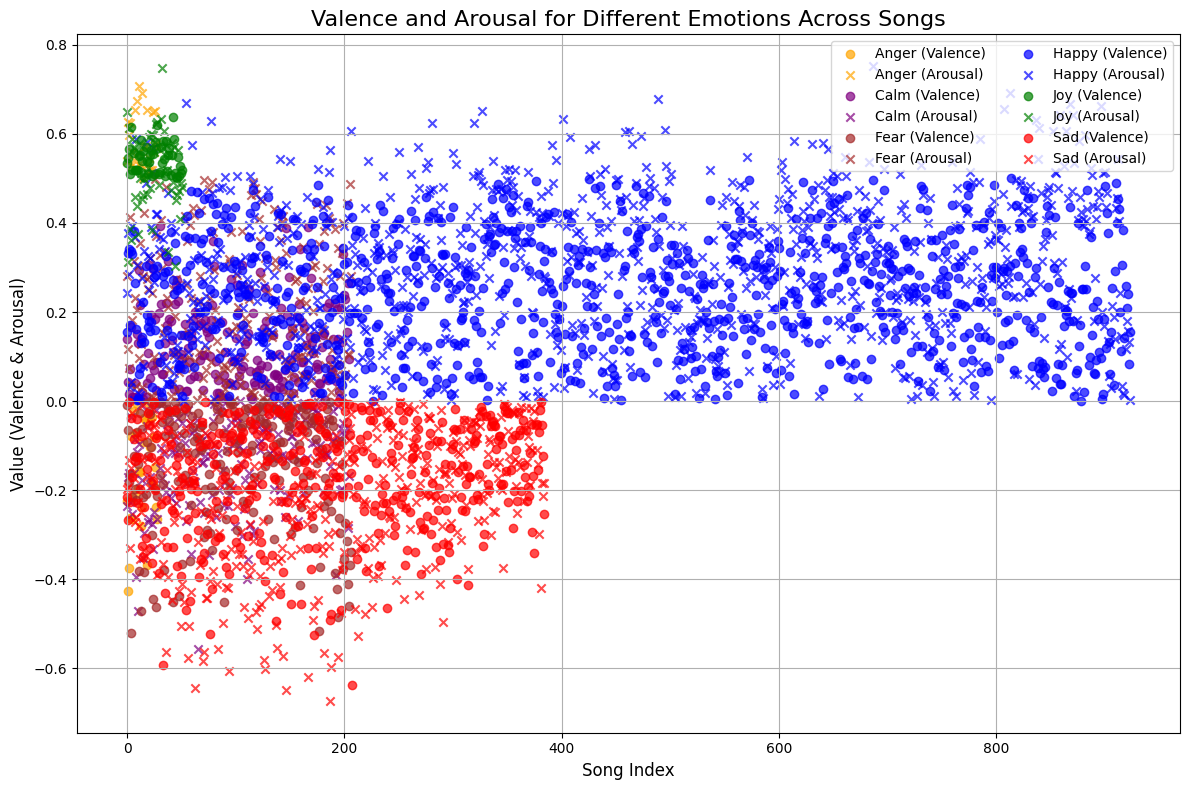

In [16]:
# Scatter plot with song index and color-coded emotion labels

plt.figure(figsize=(12, 8))

# Plot each song's valence and arousal, colored by emotion
for emotion, group in grouped:
    plt.scatter(np.arange(len(group)), group['avg_valence'], color=emotion_colors[emotion], label=f"{emotion} (Valence)", marker='o', alpha=0.7)
    plt.scatter(np.arange(len(group)), group['avg_arousal'], color=emotion_colors[emotion], label=f"{emotion} (Arousal)", marker='x', alpha=0.7)

# Add labels and title
plt.title('Valence and Arousal for Different Emotions Across Songs', fontsize=16)
plt.xlabel('Song Index', fontsize=12)
plt.ylabel('Value (Valence & Arousal)', fontsize=12)
plt.legend(loc='upper right', fontsize=10, ncol=2)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


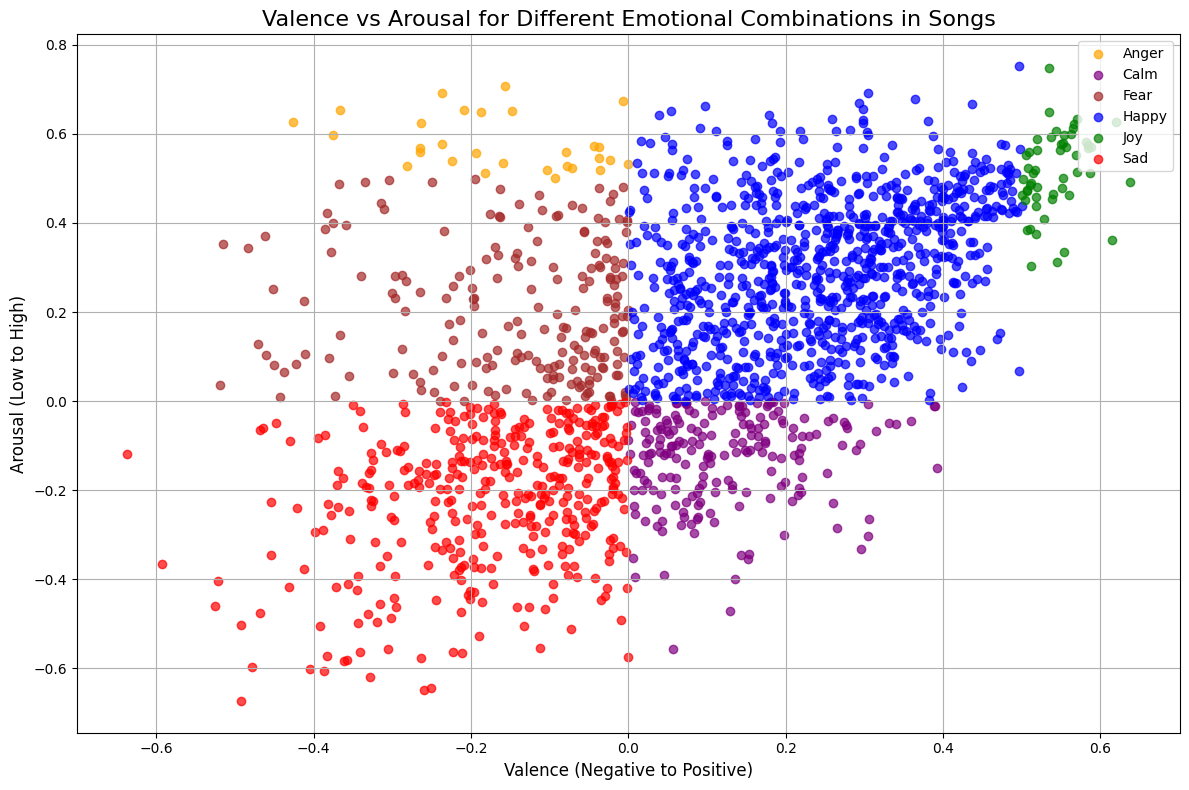

In [17]:
# Scatter plot with valence on the x-axis and arousal on the y-axis, color-coded by emotional combination

plt.figure(figsize=(12, 8))

# Plot valence vs arousal, with points color-coded by emotion
for emotion, group in grouped:
    plt.scatter(group['avg_valence'], group['avg_arousal'], color=emotion_colors[emotion], label=f"{emotion}", alpha=0.7)

# Add labels and title
plt.title('Valence vs Arousal for Different Emotional Combinations in Songs', fontsize=16)
plt.xlabel('Valence (Negative to Positive)', fontsize=12)
plt.ylabel('Arousal (Low to High)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


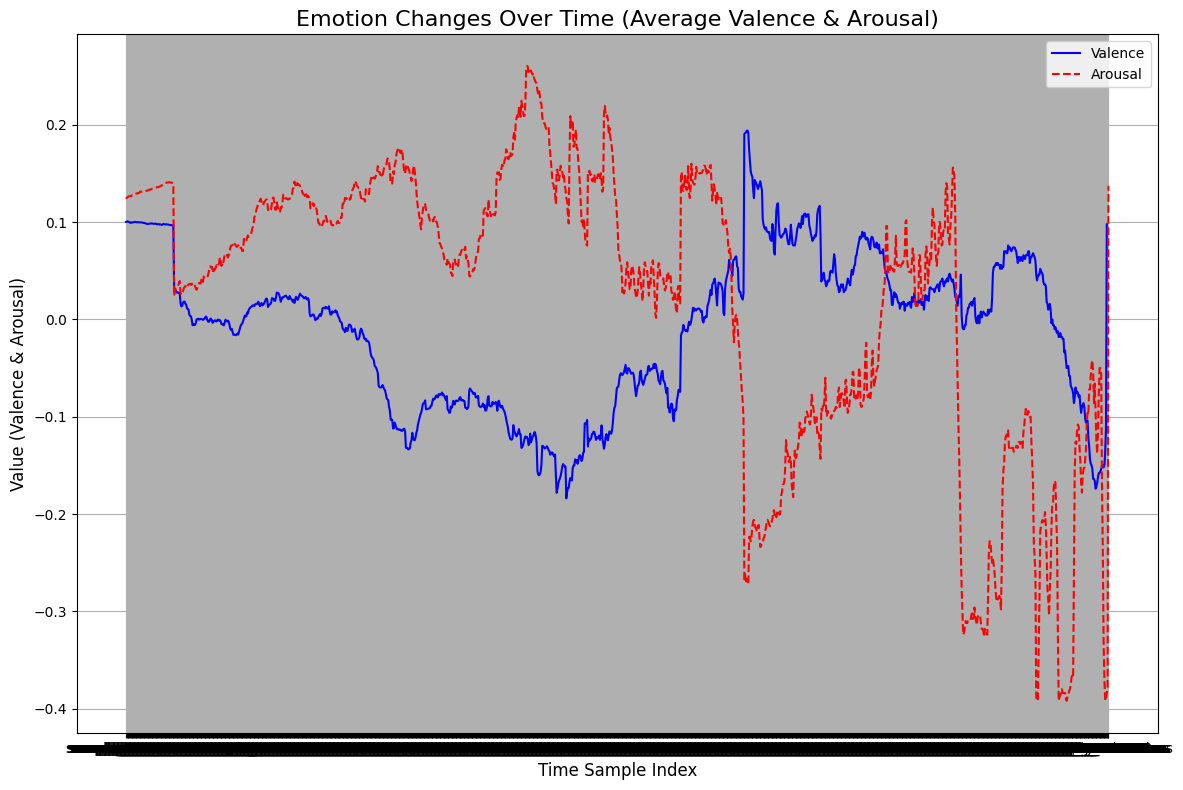

In [18]:
#  changes in emotion over time

# Extract time-based valence and arousal data for emotion tracking
# We will average the time samples over intervals for each song

# Take the time-sampled columns from the valence and arousal datasets
valence_samples = valence_df.iloc[:, 1:]
arousal_samples = arousal_df.iloc[:, 1:]

# Let's compute the average valence and arousal for each time sample across all songs
valence_time_avg = valence_samples.mean(axis=0)
arousal_time_avg = arousal_samples.mean(axis=0)

# Create a time series plot to show how valence and arousal change over time
plt.figure(figsize=(12, 8))

# Plot valence over time
plt.plot(valence_time_avg.index, valence_time_avg.values, label='Valence', color='blue', linestyle='-')
# Plot arousal over time
plt.plot(arousal_time_avg.index, arousal_time_avg.values, label='Arousal', color='red', linestyle='--')

# Add labels and title
plt.title('Emotion Changes Over Time (Average Valence & Arousal)', fontsize=16)
plt.xlabel('Time Sample Index', fontsize=12)
plt.ylabel('Value (Valence & Arousal)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


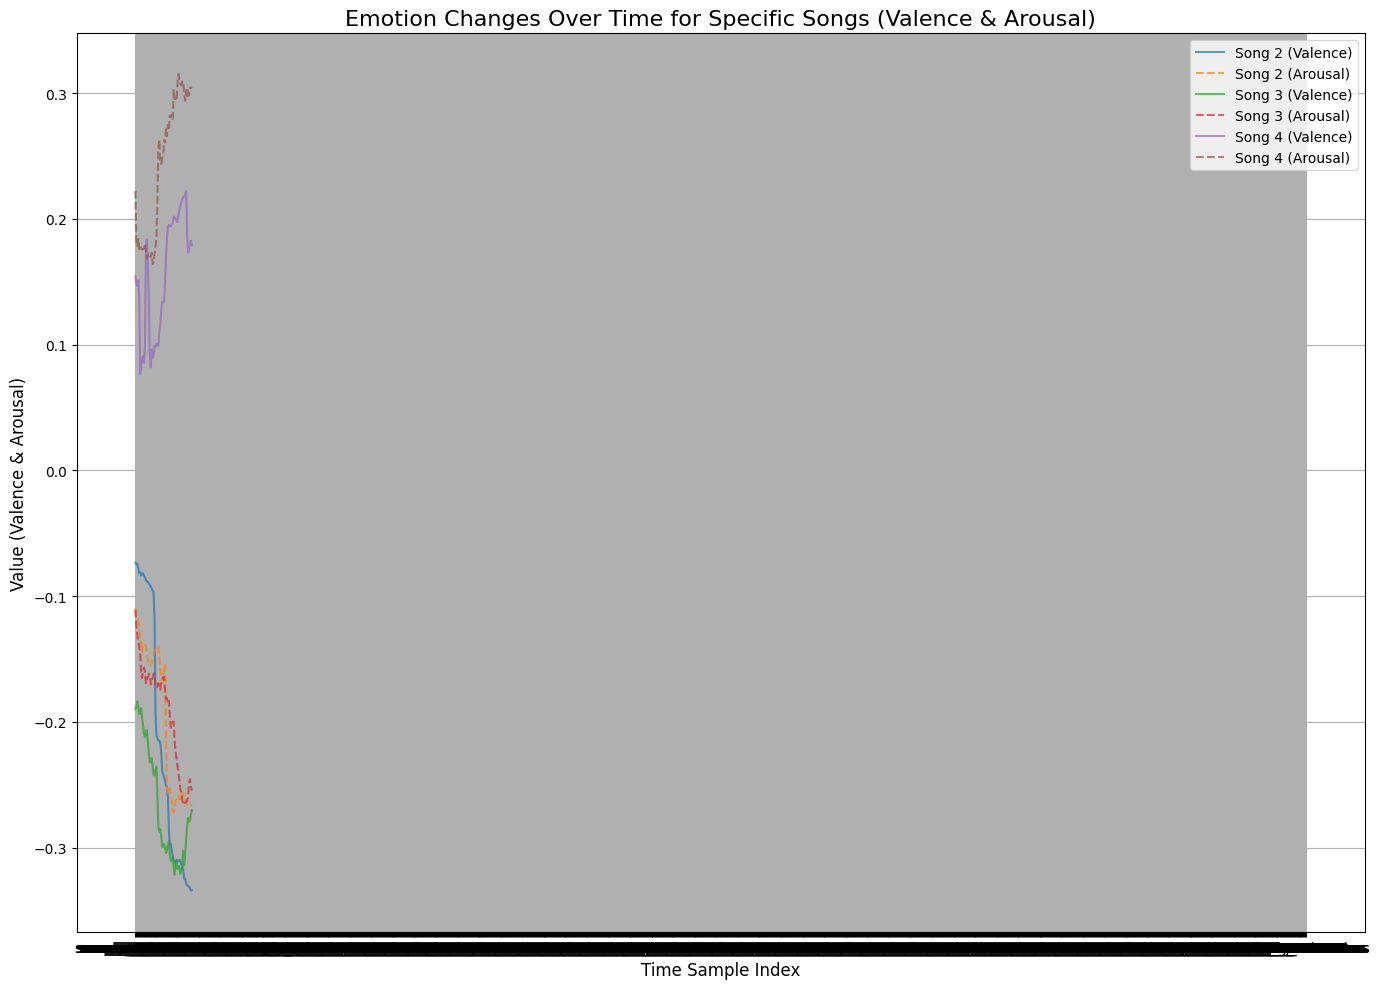

In [19]:
# Let's pick a few specific songs by their song_id to visualize the changes over time
# For example, I'll select songs with song_id 2, 3, and 4

selected_songs = [2, 3, 4]

# Create a plot to track changes in valence and arousal over time for each selected song
plt.figure(figsize=(14, 10))

for song_id in selected_songs:
    # Filter valence and arousal data for the selected song
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T
    
    # Plot valence over time for the song
    plt.plot(valence_data.index, valence_data.values, label=f'Song {song_id} (Valence)', linestyle='-', alpha=0.7)
    
    # Plot arousal over time for the song
    plt.plot(arousal_data.index, arousal_data.values, label=f'Song {song_id} (Arousal)', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Emotion Changes Over Time for Specific Songs (Valence & Arousal)', fontsize=16)
plt.xlabel('Time Sample Index', fontsize=12)
plt.ylabel('Value (Valence & Arousal)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# emotional trends across songs

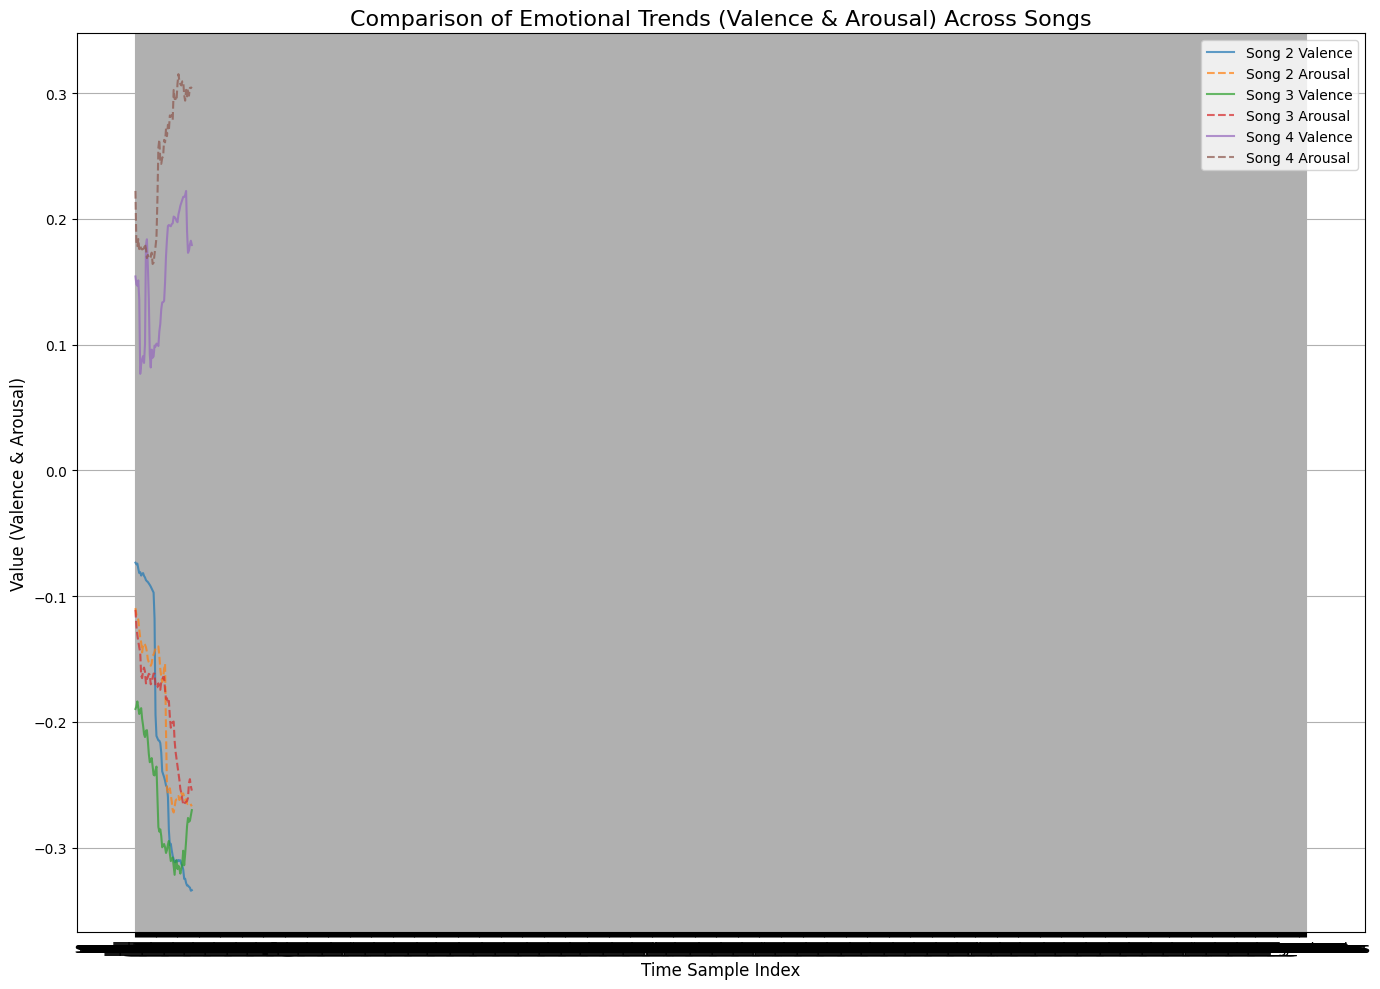

In [20]:
# Plot to compare emotional trends (valence and arousal) across multiple songs

# Create a figure for comparison of emotional trends
plt.figure(figsize=(14, 10))

for song_id in selected_songs:
    # Filter valence and arousal data for the selected song
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T
    
    # Plot valence over time for the song (solid line)
    plt.plot(valence_data.index, valence_data.values, label=f'Song {song_id} Valence', linestyle='-', alpha=0.7)
    
    # Plot arousal over time for the song (dashed line)
    plt.plot(arousal_data.index, arousal_data.values, label=f'Song {song_id} Arousal', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Comparison of Emotional Trends (Valence & Arousal) Across Songs', fontsize=16)
plt.xlabel('Time Sample Index', fontsize=12)
plt.ylabel('Value (Valence & Arousal)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


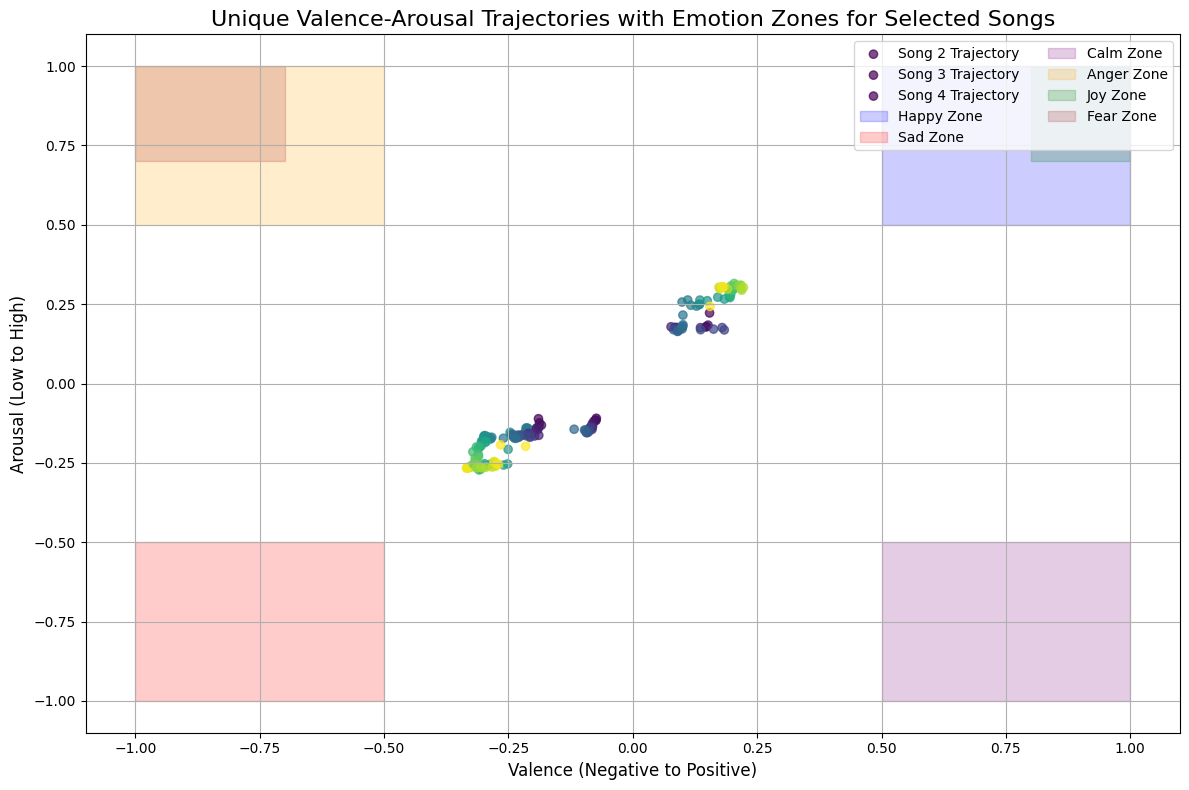

In [21]:
# There might be a mismatch in the names used in the emotion zones. Let's check them and ensure all are correctly mapped.

# Adjust emotion zones to ensure all emotions match the correct labels
emotion_zones_fixed = {
    'Happy': {'valence': (0.5, 1), 'arousal': (0.5, 1)},
    'Sad': {'valence': (-1, -0.5), 'arousal': (-1, -0.5)},
    'Calm': {'valence': (0.5, 1), 'arousal': (-1, -0.5)},
    'Anger': {'valence': (-1, -0.5), 'arousal': (0.5, 1)},
    'Joy': {'valence': (0.8, 1), 'arousal': (0.7, 1)},
    'Fear': {'valence': (-1, -0.7), 'arousal': (0.7, 1)}
}
emotion_colors_fixed = {
    'Happy': 'blue',
    'Sad': 'red',
    'Joy': 'green',
    'Anger': 'orange',
    'Calm': 'purple',
    'Fear': 'brown'
}
# Ensure that valence and arousal data for each song are aligned and plot the trajectories with emotion zones
plt.figure(figsize=(12, 8))

for idx, song_id in enumerate(selected_songs):
    # Extract valence and arousal data for the song over time, ensuring matching sizes by dropping NaN values
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    
    # Ensure that both valence and arousal are aligned in terms of rows
    min_length = min(len(valence_data), len(arousal_data))
    valence_data = valence_data[:min_length]
    arousal_data = arousal_data[:min_length]
    
    # Normalize the time samples to create a gradient effect
    time_colors = plt.cm.viridis(np.linspace(0, 1, min_length))

    # Plot the trajectory in valence-arousal space with time as the gradient
    plt.scatter(valence_data.values, arousal_data.values, color=time_colors, label=f'Song {song_id} Trajectory', alpha=0.7)

# Highlight emotion zones on the plot
for emotion, bounds in emotion_zones_fixed.items():
    plt.fill_betweenx([bounds['arousal'][0], bounds['arousal'][1]], bounds['valence'][0], bounds['valence'][1], 
                      color=emotion_colors_fixed[emotion], alpha=0.2, label=f'{emotion} Zone')

# Add labels, title, and legend
plt.title('Unique Valence-Arousal Trajectories with Emotion Zones for Selected Songs', fontsize=16)
plt.xlabel('Valence (Negative to Positive)', fontsize=12)
plt.ylabel('Arousal (Low to High)', fontsize=12)
plt.legend(loc='upper right', fontsize=10, ncol=2)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


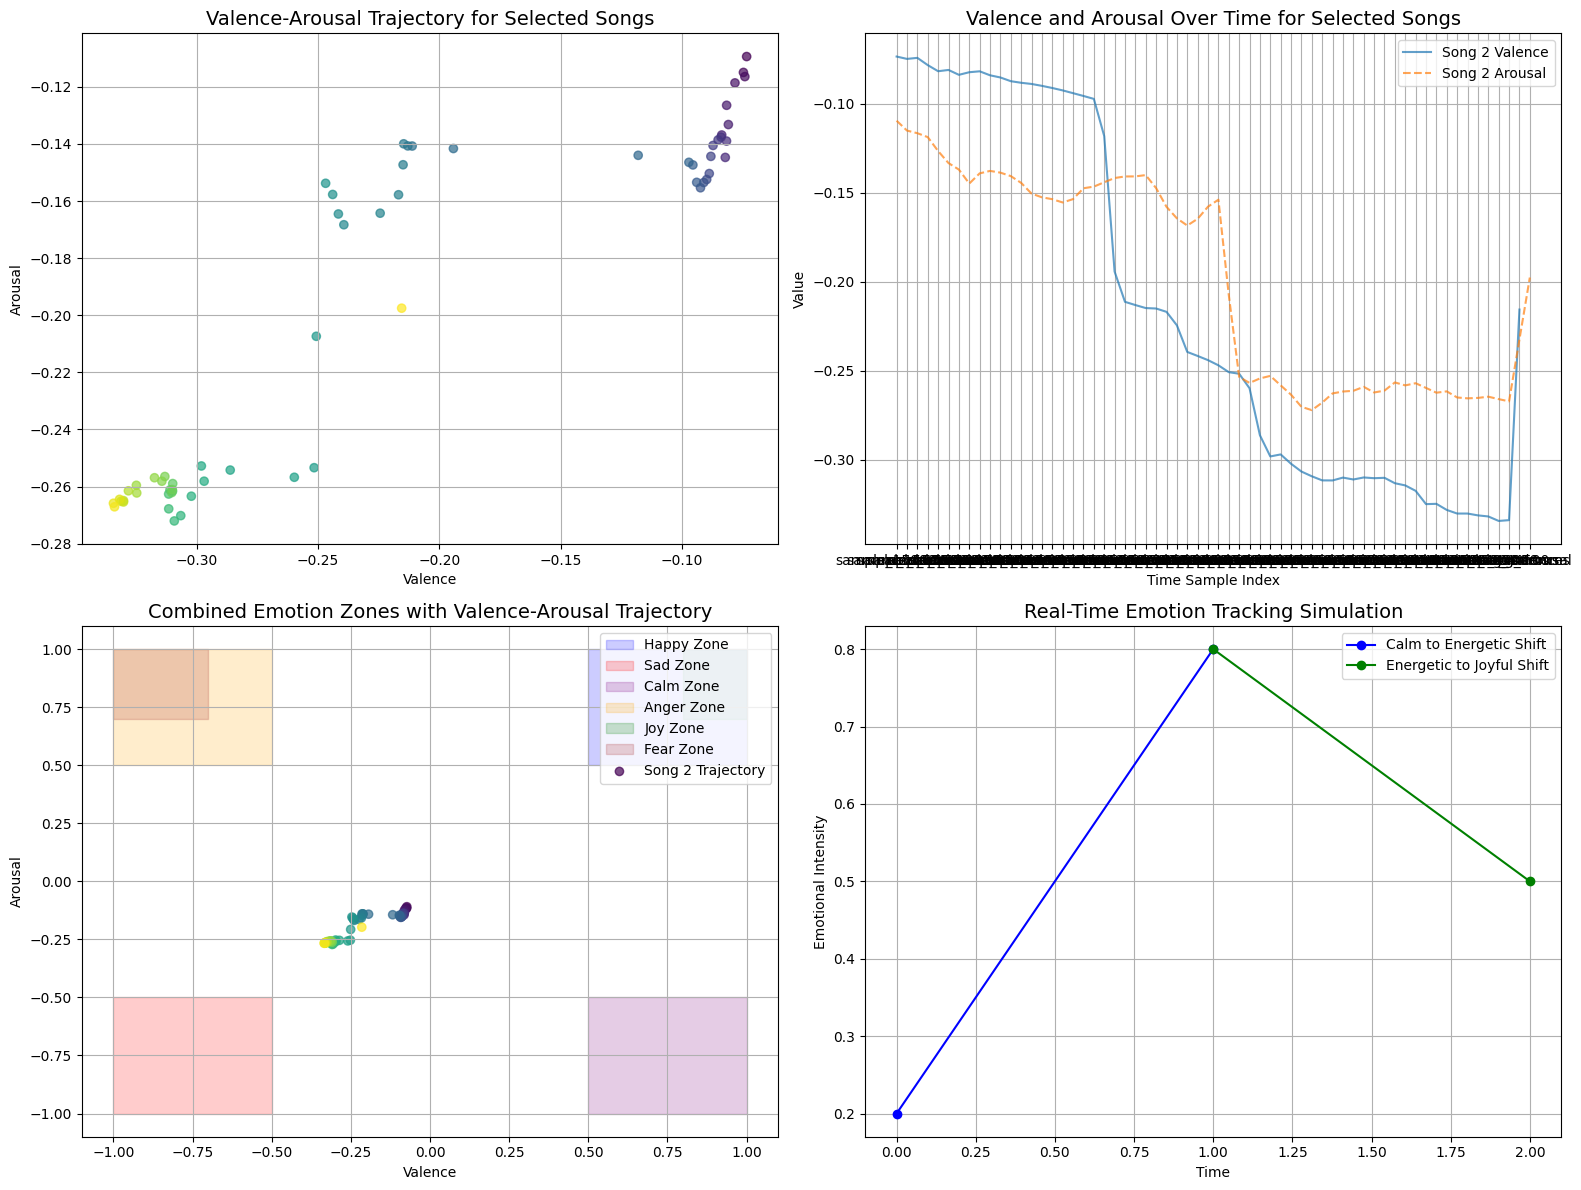

In [23]:
# Plot the valence-arousal trajectory, valence/arousal line plot, and emotion zone graph for selected songs

# First, let's create a figure with multiple subplots to show all visualizations together
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

selected_songs = [2]
# 1. Valence-Arousal Trajectory Graph
for song_id in selected_songs:
    # Extract valence and arousal data for the song over time
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    
    # Normalize the time samples for gradient
    min_length = min(len(valence_data), len(arousal_data))
    time_colors = plt.cm.viridis(np.linspace(0, 1, min_length))

    # Plot the valence-arousal trajectory
    axes[0, 0].scatter(valence_data.values[:min_length], arousal_data.values[:min_length], color=time_colors, label=f'Song {song_id} Trajectory', alpha=0.7)

axes[0, 0].set_title('Valence-Arousal Trajectory for Selected Songs', fontsize=14)
axes[0, 0].set_xlabel('Valence')
axes[0, 0].set_ylabel('Arousal')
axes[0, 0].grid(True)

# 2. Valence and Arousal Line Plot Over Time
for song_id in selected_songs:
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    
    # Plot valence and arousal over time
    axes[0, 1].plot(valence_data.index, valence_data.values, label=f'Song {song_id} Valence', linestyle='-', alpha=0.7)
    axes[0, 1].plot(arousal_data.index, arousal_data.values, label=f'Song {song_id} Arousal', linestyle='--', alpha=0.7)

axes[0, 1].set_title('Valence and Arousal Over Time for Selected Songs', fontsize=14)
axes[0, 1].set_xlabel('Time Sample Index')
axes[0, 1].set_ylabel('Value')
axes[0, 1].grid(True)
axes[0, 1].legend()

# 3. Combined Emotion Zones with Song Trajectory
for emotion, bounds in emotion_zones_fixed.items():
    axes[1, 0].fill_betweenx([bounds['arousal'][0], bounds['arousal'][1]], bounds['valence'][0], bounds['valence'][1], 
                             color=emotion_colors_fixed[emotion], alpha=0.2, label=f'{emotion} Zone')

for song_id in selected_songs:
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    
    min_length = min(len(valence_data), len(arousal_data))
    time_colors = plt.cm.viridis(np.linspace(0, 1, min_length))

    # Plot the valence-arousal trajectory in the emotion zone graph
    axes[1, 0].scatter(valence_data.values[:min_length], arousal_data.values[:min_length], color=time_colors, label=f'Song {song_id} Trajectory', alpha=0.7)

axes[1, 0].set_title('Combined Emotion Zones with Valence-Arousal Trajectory', fontsize=14)
axes[1, 0].set_xlabel('Valence')
axes[1, 0].set_ylabel('Arousal')
axes[1, 0].legend(loc='upper right')
axes[1, 0].grid(True)

# 4. Real-Time Emotion Tracking Example
# We'll simulate a simple real-time playlist adjustment based on valence/arousal
axes[1, 1].plot([0, 1], [0.2, 0.8], marker='o', linestyle='-', color='blue', label='Calm to Energetic Shift')
axes[1, 1].plot([1, 2], [0.8, 0.5], marker='o', linestyle='-', color='green', label='Energetic to Joyful Shift')

axes[1, 1].set_title('Real-Time Emotion Tracking Simulation', fontsize=14)
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Emotional Intensity')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Show the combined plots
plt.tight_layout()
plt.show()



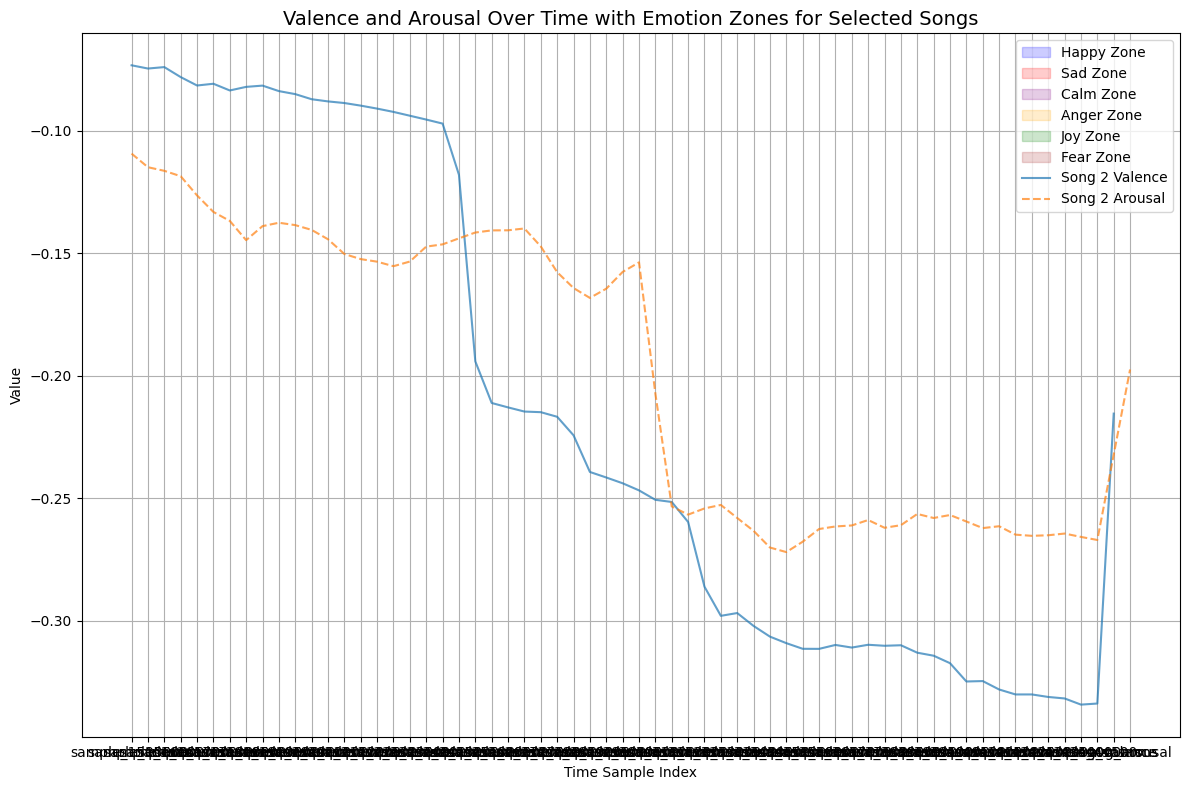

In [27]:
# Let's create a new plot that combines Graph 2 (Valence and Arousal over time) with the emotion zones from Graph 3

# Create a new figure for this combined plot
plt.figure(figsize=(12, 8))

# First, plot the emotion zones
for emotion, bounds in emotion_zones_fixed.items():
    plt.fill_betweenx([bounds['arousal'][0], bounds['arousal'][1]], bounds['valence'][0], bounds['valence'][1], 
                      color=emotion_colors_fixed[emotion], alpha=0.2, label=f'{emotion} Zone')

# Now, plot the valence and arousal lines over time for the selected songs
for song_id in selected_songs:
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    
    # Normalize to ensure equal time points
    min_length = min(len(valence_data), len(arousal_data))
    
    # Plot valence and arousal on the same plot
    plt.plot(valence_data.index[:min_length], valence_data.values[:min_length], label=f'Song {song_id} Valence', linestyle='-', alpha=0.7)
    plt.plot(arousal_data.index[:min_length], arousal_data.values[:min_length], label=f'Song {song_id} Arousal', linestyle='--', alpha=0.7)

for emotion, bounds in emotion_zones_fixed.items():
    axes[1, 0].fill_betweenx([bounds['arousal'][0], bounds['arousal'][1]], bounds['valence'][0], bounds['valence'][1], 
                             color=emotion_colors_fixed[emotion], alpha=0.2, label=f'{emotion} Zone')

for song_id in selected_songs:
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    
    min_length = min(len(valence_data), len(arousal_data))
    time_colors = plt.cm.viridis(np.linspace(0, 1, min_length))

    # Plot the valence-arousal trajectory in the emotion zone graph
    axes[1, 0].scatter(valence_data.values[:min_length], arousal_data.values[:min_length], color=time_colors, label=f'Song {song_id} Trajectory', alpha=0.7)

# Add title, labels, and grid
plt.title('Valence and Arousal Over Time with Emotion Zones for Selected Songs', fontsize=14)
plt.xlabel('Time Sample Index')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


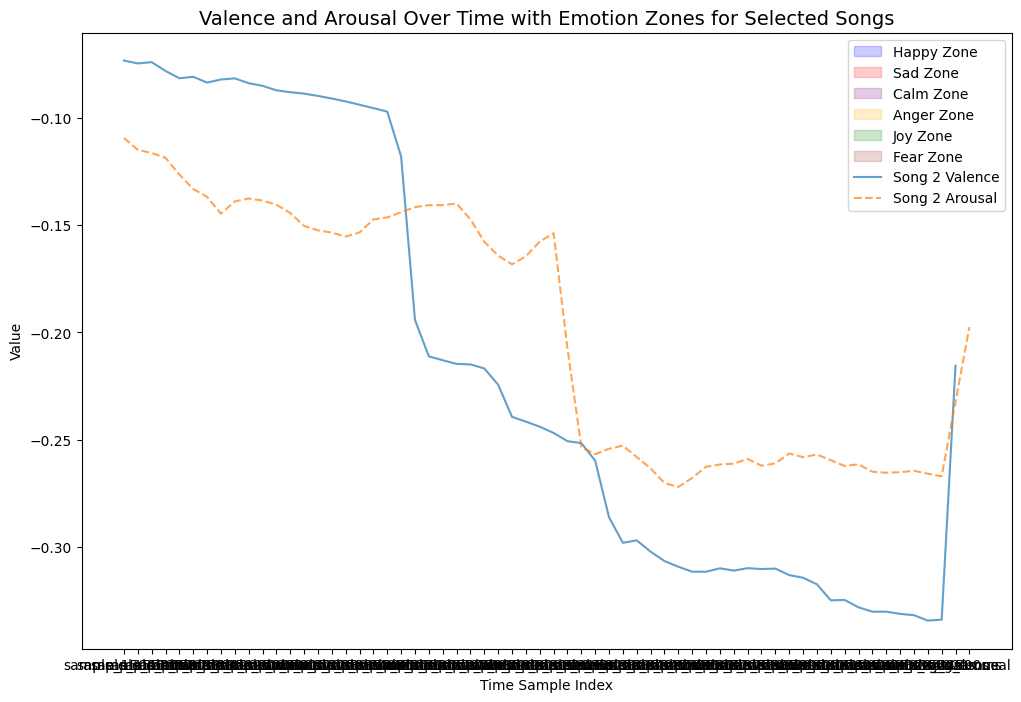

In [30]:
# Let's create a new plot that combines Graph 2 (Valence and Arousal over time) with the emotion zones from Graph 3

# Create a new figure for this combined plot
plt.figure(figsize=(12, 8))

# First, plot the emotion zones
for emotion, bounds in emotion_zones_fixed.items():
    plt.fill_betweenx([bounds['arousal'][0], bounds['arousal'][1]], bounds['valence'][0], bounds['valence'][1], 
                      color=emotion_colors_fixed[emotion], alpha=0.2, label=f'{emotion} Zone')

# Now, plot the valence and arousal lines over time for the selected songs
for song_id in selected_songs:
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    
    # Normalize to ensure equal time points
    min_length = min(len(valence_data), len(arousal_data))
    
    # Plot valence and arousal on the same plot
    plt.plot(valence_data.index[:min_length], valence_data.values[:min_length], label=f'Song {song_id} Valence', linestyle='-', alpha=0.7)
    plt.plot(arousal_data.index[:min_length], arousal_data.values[:min_length], label=f'Song {song_id} Arousal', linestyle='--', alpha=0.7)

# Add title, labels, and grid
plt.title('Valence and Arousal Over Time with Emotion Zones for Selected Songs', fontsize=14)
plt.xlabel('Time Sample Index')
plt.ylabel('Value')
plt.legend(loc='upper right')
# plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


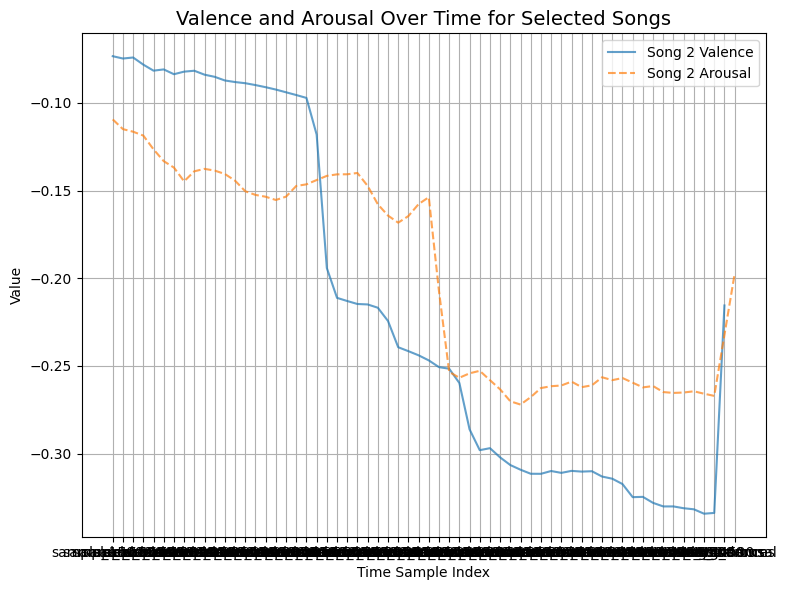

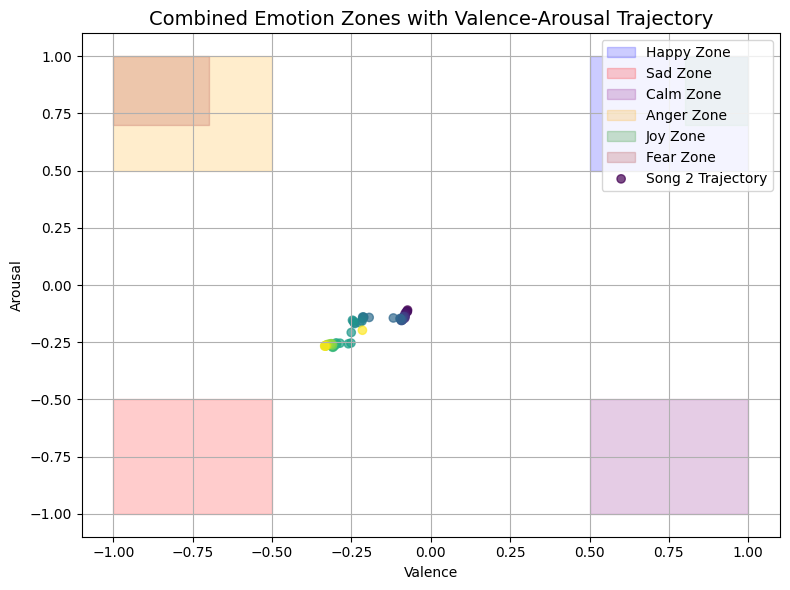

In [31]:
# Let's generate the 2nd and 3rd graphs separately

# 2. Valence and Arousal Line Plot Over Time
plt.figure(figsize=(8, 6))

for song_id in selected_songs:
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    
    # Plot valence and arousal over time
    plt.plot(valence_data.index, valence_data.values, label=f'Song {song_id} Valence', linestyle='-', alpha=0.7)
    plt.plot(arousal_data.index, arousal_data.values, label=f'Song {song_id} Arousal', linestyle='--', alpha=0.7)

plt.title('Valence and Arousal Over Time for Selected Songs', fontsize=14)
plt.xlabel('Time Sample Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# 3. Combined Emotion Zones with Song Trajectory
plt.figure(figsize=(8, 6))

# Plot emotion zones
for emotion, bounds in emotion_zones_fixed.items():
    plt.fill_betweenx([bounds['arousal'][0], bounds['arousal'][1]], bounds['valence'][0], bounds['valence'][1], 
                      color=emotion_colors_fixed[emotion], alpha=0.2, label=f'{emotion} Zone')

# Plot the valence-arousal trajectory for selected songs
for song_id in selected_songs:
    valence_data = valence_df[valence_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    arousal_data = arousal_df[arousal_df['song_id'] == song_id].iloc[:, 1:].T.dropna()
    
    min_length = min(len(valence_data), len(arousal_data))
    time_colors = plt.cm.viridis(np.linspace(0, 1, min_length))

    # Plot the valence-arousal trajectory in the emotion zone graph
    plt.scatter(valence_data.values[:min_length], arousal_data.values[:min_length], color=time_colors, label=f'Song {song_id} Trajectory', alpha=0.7)

plt.title('Combined Emotion Zones with Valence-Arousal Trajectory', fontsize=14)
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


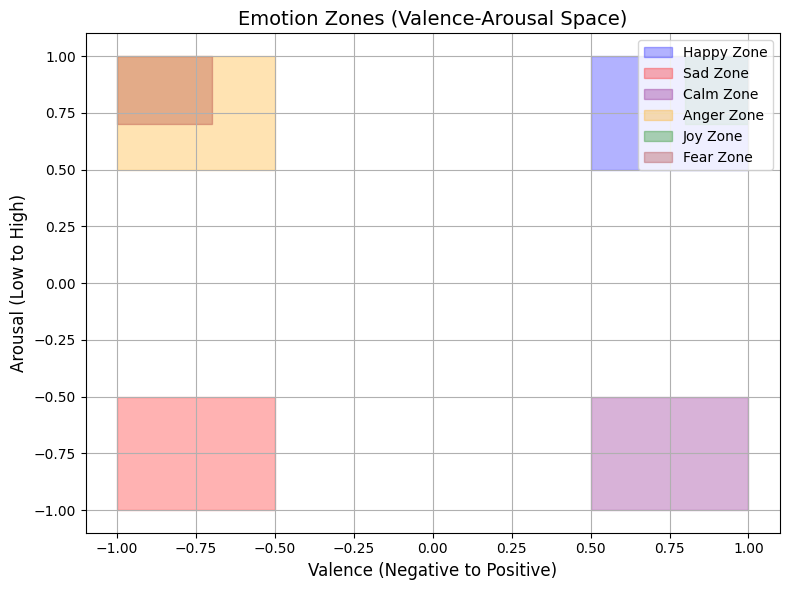

In [32]:
# Generate a clean and clear Emotion Zone plot only

plt.figure(figsize=(8, 6))

# Plot only the emotion zones clearly
for emotion, bounds in emotion_zones_fixed.items():
    plt.fill_betweenx([bounds['arousal'][0], bounds['arousal'][1]], bounds['valence'][0], bounds['valence'][1], 
                      color=emotion_colors_fixed[emotion], alpha=0.3, label=f'{emotion} Zone')

# Add labels and title
plt.title('Emotion Zones (Valence-Arousal Space)', fontsize=14)
plt.xlabel('Valence (Negative to Positive)', fontsize=12)
plt.ylabel('Arousal (Low to High)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


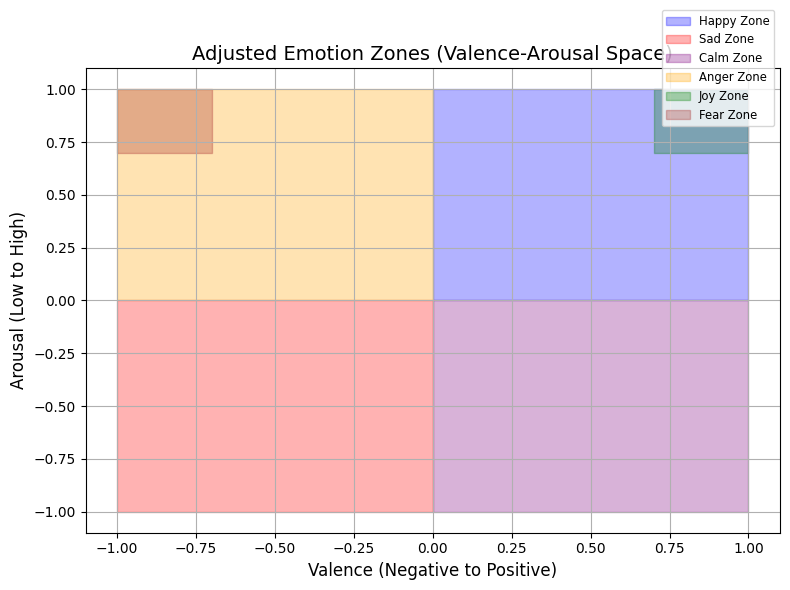

In [43]:
# Adjust the emotion zones more precisely based on the described emotional states
# Example zones: Happy (high valence, high arousal), Sad (low valence, low arousal), etc.

adjusted_emotion_zones = {
    'Happy': {'valence': (0, 1), 'arousal': (0, 1)},  # High valence, high arousal
    'Sad': {'valence': (-1, -0), 'arousal': (-1, -0)},  # Low valence, low arousal
    'Calm': {'valence': (0, 1), 'arousal': (-1, -0)},  # High valence, low arousal
    'Anger': {'valence': (-1, -0), 'arousal': (0, 1)},  # Low valence, high arousal
    'Joy': {'valence': (0.7, 1), 'arousal': (0.7, 1)},  # Very high valence, high arousal
    'Fear': {'valence': (-1, -0.7), 'arousal': (0.7, 1)}  # Very low valence, high arousal
}

# Plot the adjusted emotion zones
plt.figure(figsize=(8, 6))

# Plot only the emotion zones based on the descriptions
for emotion, bounds in adjusted_emotion_zones.items():
    plt.fill_betweenx([bounds['arousal'][0], bounds['arousal'][1]], bounds['valence'][0], bounds['valence'][1], 
                      color=emotion_colors_fixed[emotion], alpha=0.3, label=f'{emotion} Zone')

# Add labels and title
plt.title('Adjusted Emotion Zones (Valence-Arousal Space)', fontsize=14)
plt.xlabel('Valence (Negative to Positive)', fontsize=12)
plt.ylabel('Arousal (Low to High)', fontsize=12)
plt.legend(loc='right', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'merged_df' is not defined

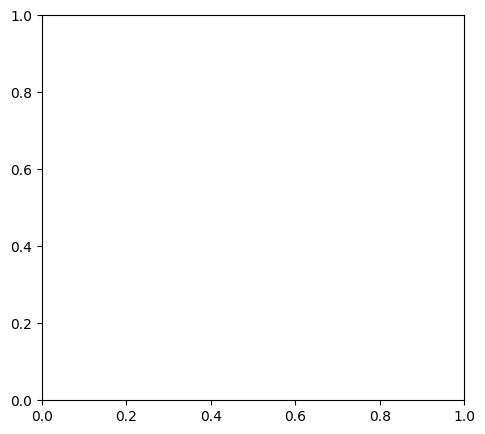